# Breast Cancer Wisconsin (Diagnostic) Data Set

## Predict whether the cancer is benign or malignant

## How it start?
<img src="figures/mdb030.jpg" width="300" /> <img src="figures/mdb032.jpg" width="300" /> <img src="figures/mdb023.jpg" width="300" /> <img src="figures/mdb028.jpg" width="300" />

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

This database is also available through the UW CS ftp server: `https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/`

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3) Ten real-valued features are computed for each cell nucleus:
	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. All feature values are recoded with four significant digits. Missing attribute values: none. Class distribution: 357 benign, 212 malignant.

**first usage:**
- W.N. Street, W.H. Wolberg and O.L. Mangasarian Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

**OR literature:**
- O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.

**Medical literature:**

- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates.  Cancer Letters 77 (1994) 163-171.
- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Image analysis and machine learning applied to breast cancer diagnosis and prognosis.  Analytical and Quantitative Cytology and Histology, Vol. 17 No. 2, pages 77-87, April 1995. 
- W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computerized breast cancer diagnosis and prognosis from fine needle aspirates.  Archives of Surgery 1995;130:511-516.
- W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computer-derived nuclear features distinguish malignant from benign breast cytology.  Human Pathology, 26:792--796, 1995.

## Benign
<img src="figures/92_4342.gif" width="300" /> <img src="figures/92_4632.gif" width="300" /> <img src="figures/92_4934.gif" width="300" /> <img src="figures/92_4964.gif" width="300" /> <img src="figures/92_5236.gif" width="300" /> <img src="figures/92_5277.gif" width="300" /> <img src="figures/92_5291.gif" width="300" /> <img src="figures/92_5292.gif" width="300" /> <img src="figures/92_5311.gif" width="300" /> <img src="figures/92_751.gif" width="300" />

## Malignant
<img src="figures/91_5691.gif" width="300" /> <img src="figures/91_6799.gif" width="300" /> <img src="figures/91_6838.gif" width="300" /> <img src="figures/91_9555.gif" width="300" /> <img src="figures/92_5622.gif" width="300" /> <img src="figures/92_6125.gif" width="300" /> <img src="figures/92_6424.gif" width="300" /> <img src="figures/92_6682.gif" width="300" /> <img src="figures/92_6954.gif" width="300" /> <img src="figures/92_7241.gif" width="300" />

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Run the following two lines of code for Uncaught Error: Script error for plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv("data/data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Let's look how many missing data we have

In [4]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

## Let's look some statistics about data

In [6]:
df.shape

(569, 31)

In [7]:
df["diagnosis"].value_counts()#.unique()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


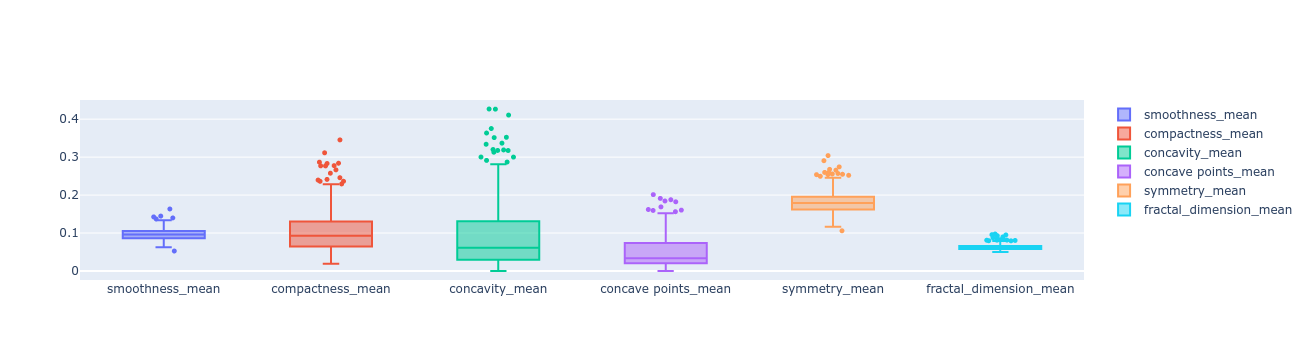

In [9]:
names = df.columns[5:11]
# convert DataFrame to list
values=[] 
for column in df.iloc[:,5:11].columns:
    li = df[column].tolist()
    values.append(li)
#colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd in zip(names, values):
        fig.add_trace(go.Box(y=yd,name=xd,boxpoints='outliers',jitter=0.5,whiskerwidth=0.2,marker_size=5,line_width=2))
fig.show()

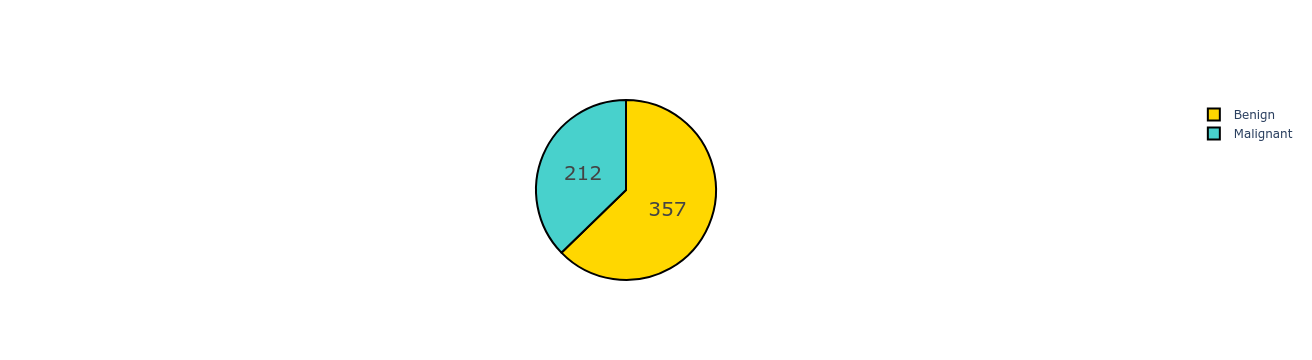

In [10]:
fig = go.Figure(data=[go.Pie(labels=['Benign','Malignant'], values=df['diagnosis'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

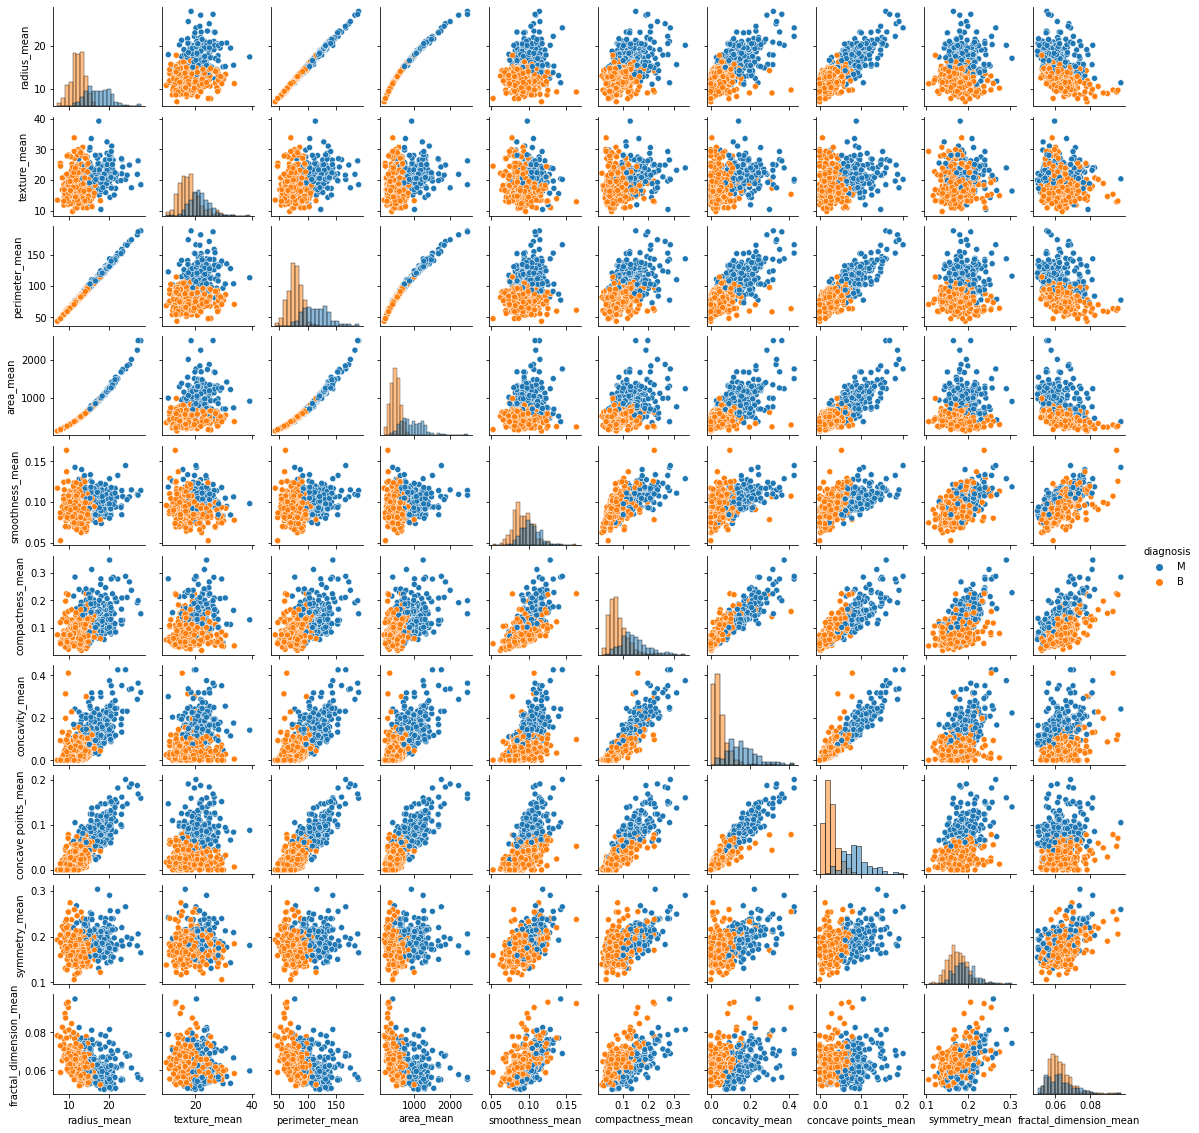

In [11]:
sns.pairplot(df.iloc[:,:11],hue='diagnosis', diag_kind='hist',height=1.6)

## Now, how many correlations we have between variables and let's look the similarity measure between couple of parameters

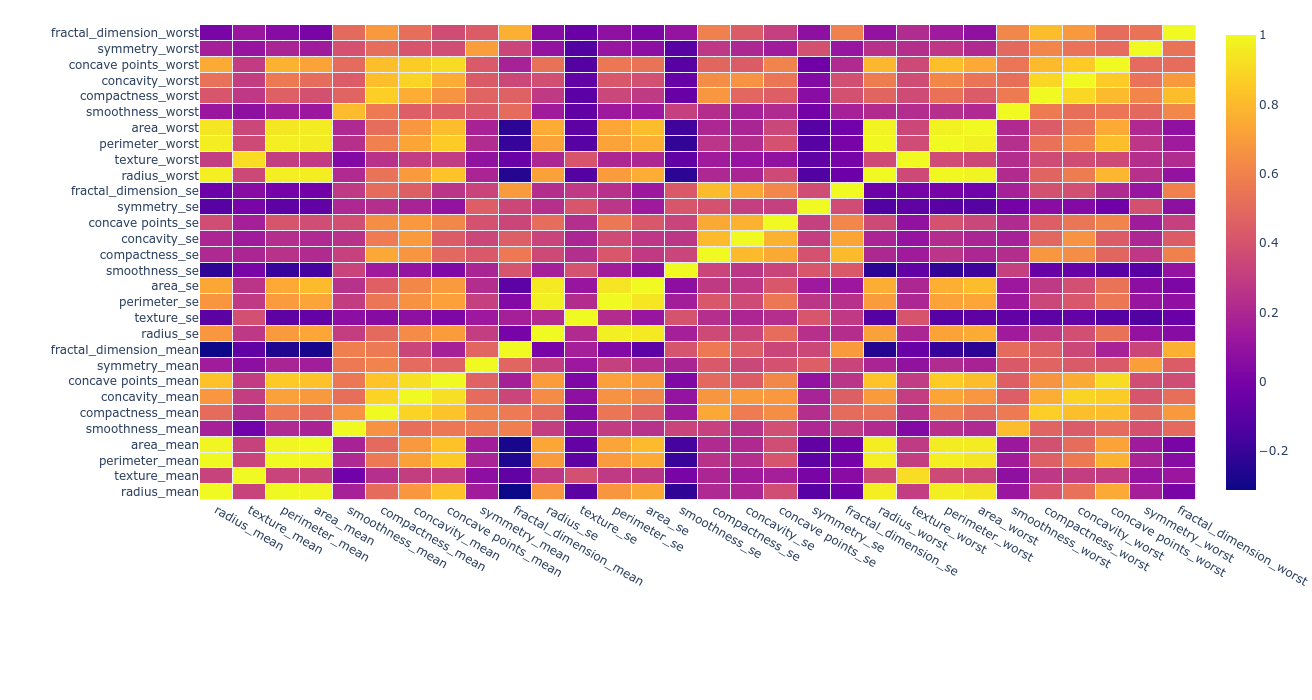

In [12]:
corr = df.iloc[:,1:].corr()
fig = go.Figure(data=go.Heatmap(z=np.array(corr),x=corr.columns.tolist(),y=corr.columns.tolist(),xgap = 1,ygap = 1))
fig.update_layout(margin = dict(t=25,r=0,b=200,l=200),width = 1000, height = 700)
fig.show()

## Pre-procesing
Now let's do a little pre-processing to change the values of the variable to be predicted and convert it to numerical values

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M:1, B:0
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
##Data split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:11], df['diagnosis'], test_size = 0.2, random_state = random_state)

In [15]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960
...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544


## Dimensionality reduction

From correlation matrix and Joint and marginal distributions plots, we observe that some features are highly correlated, like radius_mean, perimeter_mean and area_mean. Those features have almost the same effect on the dependent variable. In real world problem, classification algorithms including too many features in dataset commonly suffer from the "Curse of Dimensionality", which means more data, bulky computation, and also overfitting risk. Both feature selection (selecting specific features to include) and feature extraction(extracting a new feature set from the input features) can effectively avoid these problems. In practice, the effectiveness of dimensionality reduction highly depends on the algorithm to be applied later and type of the data to be passed into the methodology. Here, we will try two different methods: Principal component analysis (PCA) and Recursive features elimination(RFE), and also compare the results by separately using them on classification algorithms.

## Grid Search Cross validation

### Find the best hyperparameters

In [16]:
def modelselection(classifier, parameters, scoring, X_train):
    clf = GridSearchCV(estimator=classifier,
                   param_grid=parameters,
                   scoring= scoring,
                   cv=5,
                   n_jobs=-1)# n_jobs refers to the number of CPU's that you want to use for excution, -1 means that use all available computing power.
    clf.fit(X_train, y_train)
    cv_results = clf.cv_results_
    best_parameters = clf.best_params_
    best_result = clf.best_score_
    print('The best parameters for classifier is', best_parameters)
    print('The best training score is %.3f:'% best_result)
#    print(sorted(cv_results.keys()))
    return cv_results, best_parameters, best_result

## Model Measures

### Confusion Matrices & Metrics

A confusion matrix is a table that categorizes predictions according to whether they match the actual value

    True Positive (TP): Malignant tumour correctly classified as Malignant
    True Negative (TN): Benign tumour correctly classified as benign
    False Positive (FP): Benign tumour incorrectly classified as malignant
    False Negative (FN): Malignant tumour incorrectly classified as benign

### Metrics

    Accuracy (called the success rate): (tp+tn)/(tp+tn+fp+fn)
    Sensitivity (also called the true positive rate): tp/(tp+fn)
    Specificity (also called the true negative rate): tn/(tn+fp)
    Precision (also called the positive predictive value): tp/(tp+fp)
    Recall: as the same as sensitivity
    F-measure: 2PrecisionRecall/(Recall+Precision) = 2tp/(2tp+fp+fn)


In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, precision_recall_curve, auc
def metrics(X,CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Sensitivity=tp/(tp+fn)
    Specificity=tn/(tn+fp)
    Precision=tp/(tp+fp)
    F_measure=2*tp/(2*tp+fp+fn)
    print('Accuracy=%.3f'%Accuracy)
    print('Sensitivity=%.3f'%Sensitivity) # as the same as recall
    print('Specificity=%.3f'%Specificity)
    print('Precision=%.3f'%Precision)
    print('F-measure=%.3f'%F_measure)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure
 #   plot_confusion_matrix(CV_clf, X_test, y_test)

## Applying models

### Logisitic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000)
parameters_log = {
            'penalty' : ['l2'],  
            'C' : [0.01, 0.1, 1, 10, 100]
}
scoring='accuracy'   # scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_train)

The best parameters for classifier is {'C': 10, 'penalty': 'l2'}
The best training score is 0.914:


In [19]:
# Classifier with the best hyperparameters
logReg_clf = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_clf.fit(X_train, y_train)

# Metrics
logReg_metrics = metrics(X_test,logReg_clf)

Accuracy=0.947
Sensitivity=0.930
Specificity=0.958
Precision=0.930
F-measure=0.930


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
parameters_rf = {
    'n_estimators': [20, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}
# We can test values for other parameters, such as max_features, max_depth, max_leaf_nodes, to see if the accuracy further impoves or not
scoring_rf = 'accuracy' 
"""
    scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""
classifier_rf = RandomForestClassifier(random_state=random_state)

# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring_rf, X_train)

# Classifier with the best hyperparameters
rf_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_clf.fit(X_train, y_train)

# Metrics
rf_metrics = metrics(X_test,rf_clf)

The best parameters for classifier is {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 20}
The best training score is 0.941:
Accuracy=0.956
Sensitivity=0.930
Specificity=0.972
Precision=0.952
F-measure=0.941


### Gradient Booting models

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
parameters_gb = {
    'n_estimators': [20, 50, 100, 150, 200],
    'learning_rate' : [0.05, 0.1],#, 0.15, 0.2],
    'max_depth': [1, 3, 5],#, 7],
    'min_samples_split': [200, 400],#, 600, 800],
    'max_features': [3, 5, 7],#, 9],
}
# We can test values for other parameters, such as max_features, max_depth, max_leaf_nodes, to see if the accuracy further impoves or not
scoring_gb = 'accuracy' 
"""
    scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""
classifier_gb = GradientBoostingClassifier(random_state=random_state)

# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_gb,parameters_gb, scoring_gb, X_train)

# Classifier with the best hyperparameters
gb_clf = GradientBoostingClassifier(n_estimators = best_param['n_estimators'],
                                    learning_rate = best_param['learning_rate'],
                                    max_depth = best_param['max_depth'],
                                    min_samples_split = best_param['min_samples_split'],
                                    max_features = best_param['max_features'],
                                    random_state=random_state)
gb_clf.fit(X_train, y_train)

# Metrics
gb_metrics = metrics(X_test,gb_clf)

The best parameters for classifier is {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 5, 'min_samples_split': 200, 'n_estimators': 200}
The best training score is 0.949:
Accuracy=0.965
Sensitivity=0.953
Specificity=0.972
Precision=0.953
F-measure=0.953


### Multi-Layer Perceptron Neural Network

In [22]:
from sklearn.neural_network import MLPClassifier
parameters_mlp = {
    'learning_rate_init': [0.1, 0.01, 0.001],
    'learning_rate' : ['invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50,50,50), (50,100,50)],#, (100,)],
    'activation': ['tanh'],#, 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['adaptive'],
}
# We can test values for other parameters, such as max_features, max_depth, max_leaf_nodes, to see if the accuracy further impoves or not
scoring_mlp = 'accuracy' 
"""
    scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""

classifier_mlp = MLPClassifier(random_state=random_state)

# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_mlp,parameters_mlp, scoring_mlp, X_train)

mlp_clf = MLPClassifier(learning_rate_init=best_param['learning_rate_init'],
                        learning_rate=best_param['learning_rate'],
                        hidden_layer_sizes=best_param['hidden_layer_sizes'],
                        activation=best_param['activation'],
                        solver=best_param['solver'],
                        alpha=best_param['alpha'],
                        random_state=random_state,
                        verbose=True)

# Fit data onto the model
mlp_clf.fit(X_train,y_train)
# Metrics
mlp_metrics = metrics(X_test,mlp_clf)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

The best parameters for classifier is {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
The best training score is 0.890:
Iteration 1, loss = 0.66499011
Iteration 2, loss = 0.63975771
Iteration 3, loss = 0.61662946
Iteration 4, loss = 0.59679898
Iteration 5, loss = 0.57587150
Iteration 6, loss = 0.55968738
Iteration 7, loss = 0.54293642
Iteration 8, loss = 0.52787075
Iteration 9, loss = 0.52136355
Iteration 10, loss = 0.51404665
Iteration 11, loss = 0.50667386
Iteration 12, loss = 0.49298887
Iteration 13, loss = 0.50119421
Iteration 14, loss = 0.48203220
Iteration 15, loss = 0.47837000
Iteration 16, loss = 0.47321150
Iteration 17, loss = 0.44500188
Iteration 18, loss = 0.44824756
Iteration 19, loss = 0.43079140
Iteration 20, loss = 0.41704777
Iteration 21, loss = 0.41924283
Iteration 22, loss = 0.40085380
Iteration 23, loss = 0.39840945
Iteration 24, loss = 0.37988922
Iteration 25, los

## Model Performance Plot

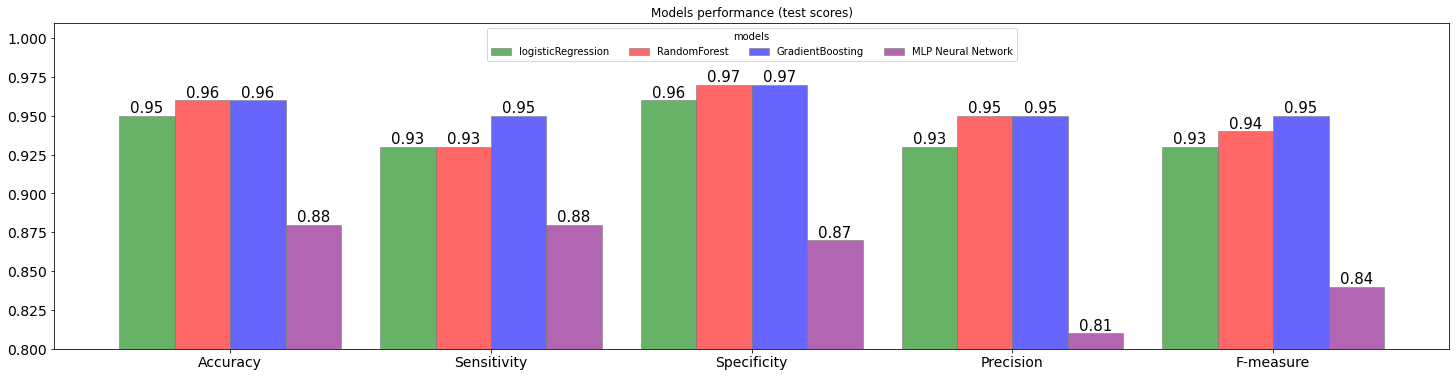

In [23]:
models_metrics = {'logisticRegression': [round(elem, 2) for elem in logReg_metrics], 
                  'RandomForest' : [round(elem, 2) for elem in rf_metrics],
                  'GradientBoosting' : [round(elem, 2) for elem in gb_metrics],
                  'MLP Neural Network' : [round(elem, 2) for elem in mlp_metrics]
                 }
index=['Accuracy','Sensitivity','Specificity','Precision', 'F-measure']
df_scores = pd.DataFrame(data = models_metrics, index=index)
ax = df_scores.plot(kind='bar', figsize = (25,6), ylim = (0.80, 1.01), width = 0.85, 
                    color = ['green', 'red', 'blue', 'purple'],
                    rot = 0, title ='Models performance (test scores)',
                    edgecolor = 'grey', alpha = 0.6, fontsize=14)
ax.legend(loc='upper center', ncol=4, title="models")
for container in ax.containers:
    ax.bar_label(container, fontsize=15)
plt.show()



### Plot the confusion matrix

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
cm_rf = confusion_matrix(y_test, rf_clf.predict(X_test))
cm_gb = confusion_matrix(y_test, gb_clf.predict(X_test))
cm_log = confusion_matrix(y_test, logReg_clf.predict(X_test))
cm_mlp = confusion_matrix(y_test, mlp_clf.predict(X_test))
cm_rf2 = confusion_matrix(df['diagnosis'], rf_clf.predict(df.iloc[:,1:11]))
cm_gb2 = confusion_matrix(df['diagnosis'], gb_clf.predict(df.iloc[:,1:11]))
cm_log2 = confusion_matrix(df['diagnosis'], logReg_clf.predict(df.iloc[:,1:11]))
cm_mlp2 = confusion_matrix(df['diagnosis'], mlp_clf.predict(df.iloc[:,1:11]))

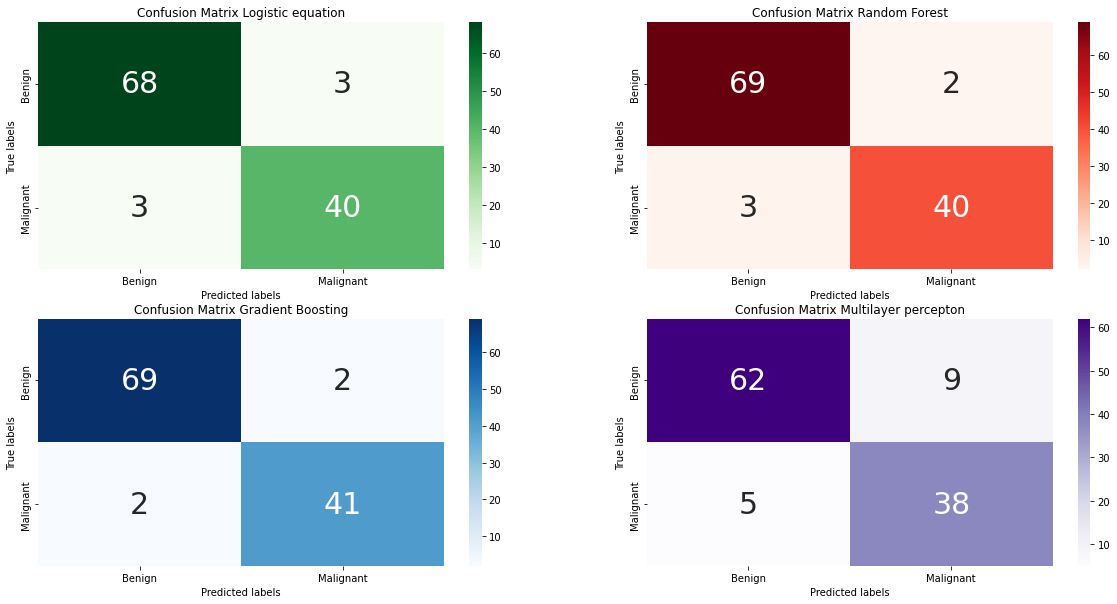

In [26]:
plt.figure(figsize=(20,10))
ax= plt.subplot(2,2,2)
sns.heatmap(cm_rf, annot=True, fmt='g', ax=ax, cmap='Reds',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Random Forest')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax= plt.subplot(2,2,3)
sns.heatmap(cm_gb, annot=True, fmt='g', ax=ax, cmap='Blues',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Gradient Boosting')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax= plt.subplot(2,2,1)
sns.heatmap(cm_log, annot=True, fmt='g', ax=ax, cmap='Greens',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Logistic equation')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax= plt.subplot(2,2,4)
sns.heatmap(cm_mlp, annot=True, fmt='g', ax=ax, cmap='Purples',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Multilayer percepton')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

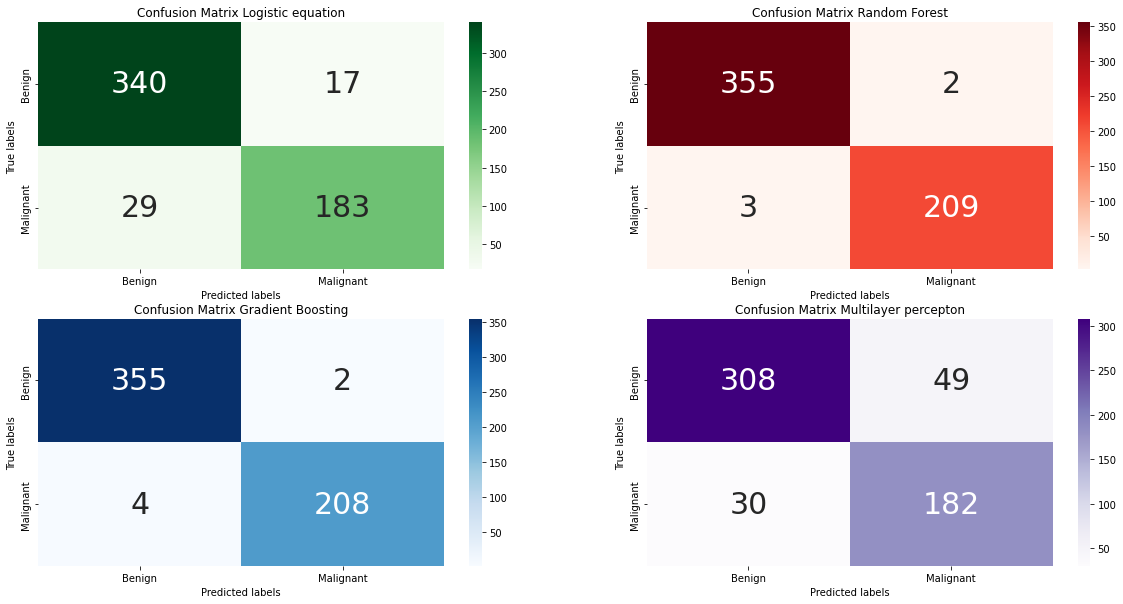

In [27]:
plt.figure(figsize=(20,10))
ax= plt.subplot(2,2,2)
sns.heatmap(cm_rf2, annot=True, fmt='g', ax=ax, cmap='Reds',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Random Forest')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax= plt.subplot(2,2,3)
sns.heatmap(cm_gb2, annot=True, fmt='g', ax=ax, cmap='Blues',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Gradient Boosting')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax= plt.subplot(2,2,1)
sns.heatmap(cm_log2, annot=True, fmt='g', ax=ax, cmap='Greens',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Logistic equation')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax= plt.subplot(2,2,4)
sns.heatmap(cm_mlp2, annot=True, fmt='g', ax=ax, cmap='Purples',annot_kws={'fontsize':30})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Multilayer percepton')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()